In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
import scipy

$$
a^TX^TYb+\lambda_1(a^TX^TXa-I)+\lambda_2(b^TY^TYb-I)\\
\frac{dC}{da}=X^TYb+\lambda_1(X^TXa)\\
\frac{dC}{db}=Y^TXa+\lambda_2(Y^TYb)\\
\frac{dC}{d\lambda_1}=a^TX^TXa-I\\
\frac{dC}{d\lambda_2}=b^TY^TYb-I
$$

In [2]:
def streamingCCA(X,Y,n):
    
    length,m = X.shape
    
    a = np.random.randn(m,n)
    a,_ = np.linalg.qr(a, mode='reduced')
    b = np.random.randn(m,n)
    b,_ = np.linalg.qr(b, mode='reduced')
    
    l1 = 0.4
    l2 = 0.4
    
    list1 = []
    list2 = []
    
    corr_list = np.zeros((n,499))
    
    covx = np.zeros((m,m))
    covy = np.zeros((m,m))
    
    eta1 = 0.0025
    eta2 = 0.0005
    
    c11 = []
    c22 = []
    c12 = []
    
    for i in range(112800):
        
        x = X[i,:]
        y = Y[i,:]
        
        c12.append(np.outer(x,y))
        c11.append(np.outer(x,x))
        c22.append(np.outer(y,y))
        
    for j in range(0,499):
        for i in range(500):
    
            ind = (j*500+i)%112800
            
            a += eta1*(c12[ind]@b-l1*(c11[ind]@a))
            b += eta1*(c12[ind].T@a-l2*(c22[ind]@b))
            l1 += eta2*(a.T@c11[ind]@a-1)
            l2 += eta2*(b.T@c22[ind]@b-1)
    
        X_s = X@a
        Y_s = Y@b    
        list1.append(float(l1.copy()))
        list2.append(float(l2.copy()))
        
        for k in range(n):
            corr_list[k,j] = np.corrcoef(X_s.T,Y_s.T)[n+k,k]

        
    return a,b,list1,list2,corr_list

In [3]:
'''
l1 = np.random.normal(size=100000)
l2 = np.random.normal(size=100000)
l3 = np.random.normal(size=100000)

latents = np.array([l1, l1*0.5, l1*0.25, l2*0.7, l2*0.3, l3*0.5]).T
X = latents + np.random.normal(size=6 * 100000).reshape((100000, 6))*0.5
Y = latents + np.random.normal(size=6 * 100000).reshape((100000, 6))*0.5

X = X-X.mean(axis=0)
Y = Y-Y.mean(axis=0)
'''

'\nl1 = np.random.normal(size=100000)\nl2 = np.random.normal(size=100000)\nl3 = np.random.normal(size=100000)\n\nlatents = np.array([l1, l1*0.5, l1*0.25, l2*0.7, l2*0.3, l3*0.5]).T\nX = latents + np.random.normal(size=6 * 100000).reshape((100000, 6))*0.5\nY = latents + np.random.normal(size=6 * 100000).reshape((100000, 6))*0.5\n\nX = X-X.mean(axis=0)\nY = Y-Y.mean(axis=0)\n'

In [4]:
'''
x = tf.keras.datasets.cifar10.load_data()[0][0]
x = x.reshape(-1,32*32*3)
x = x/255
x = (x - x.mean(axis=0))
X = x[:,:10]
Y = x[:,-10:]
'''

'\nx = tf.keras.datasets.cifar10.load_data()[0][0]\nx = x.reshape(-1,32*32*3)\nx = x/255\nx = (x - x.mean(axis=0))\nX = x[:,:10]\nY = x[:,-10:]\n'

In [5]:
x = np.load('balanced-MNIST.npy')
x = x/255
x = (x - x.mean(axis=0))
X = x[:,300:335]
Y = x[:,400:435]

In [6]:
n=1
a,b,list1,list2,corr_list = streamingCCA(X, Y, n)
cca = CCA(n_components=n,max_iter=60000)
cca.fit(X, Y)
X_c, Y_c = cca.transform(X, Y)

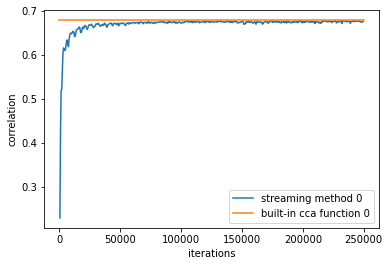

In [7]:
for i in range(n):
    plt.plot(np.array(list(range(1,500)))*500,corr_list[i,:],label='streaming method {}'.format(i))
    plt.plot([100,250000],[np.corrcoef(X_c.T,Y_c.T)[n+i,i],np.corrcoef(X_c.T,Y_c.T)[n+i,i]],label='built-in cca function {}'.format(i))
    plt.xlabel('iterations')
    plt.ylabel('correlation')
    plt.legend()
    plt.show()

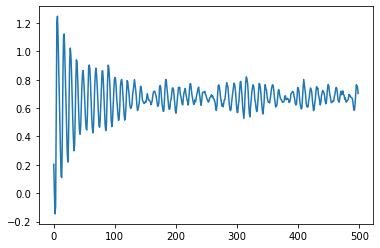

In [8]:
plt.plot(list1)

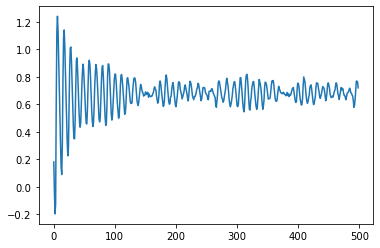

In [9]:
plt.plot(list2)

In [10]:
corr_list

array([[0.22942113, 0.42565901, 0.51907771, 0.52047618, 0.56105481,
        0.60364364, 0.61551086, 0.61113809, 0.60944592, 0.61154869,
        0.6212145 , 0.63036629, 0.6335719 , 0.62343462, 0.6181231 ,
        0.6340868 , 0.64239168, 0.64819665, 0.64899614, 0.64773588,
        0.64923124, 0.65258504, 0.65289865, 0.65090037, 0.64139199,
        0.64153019, 0.64928819, 0.65631318, 0.65658448, 0.65799807,
        0.65906158, 0.66073884, 0.66308952, 0.65885862, 0.6504771 ,
        0.65036139, 0.65464222, 0.66279735, 0.6615034 , 0.65929926,
        0.6639373 , 0.66642127, 0.66602764, 0.66350124, 0.65957422,
        0.65727188, 0.6610055 , 0.66563809, 0.66791119, 0.66721701,
        0.66711229, 0.66790503, 0.66924466, 0.66634013, 0.6649733 ,
        0.6612124 , 0.66306498, 0.66418905, 0.6658642 , 0.66966471,
        0.6699889 , 0.66924765, 0.66957367, 0.67140787, 0.66916161,
        0.66664716, 0.66471617, 0.66501205, 0.66724023, 0.66676823,
        0.66889065, 0.66667579, 0.6676162 , 0.67

In [11]:
a/np.linalg.norm(a)

array([[-0.06752733],
       [-0.17921351],
       [-0.09487112],
       [ 0.18869752],
       [ 0.23150286],
       [ 0.00471095],
       [ 0.02291861],
       [-0.02709967],
       [ 0.14502042],
       [ 0.09532783],
       [ 0.01364344],
       [-0.14104902],
       [-0.20823497],
       [-0.16170209],
       [-0.10925236],
       [-0.01728076],
       [ 0.06476883],
       [ 0.03198256],
       [ 0.05259896],
       [ 0.01850146],
       [-0.05787579],
       [-0.0020249 ],
       [ 0.00562161],
       [ 0.07433827],
       [ 0.0051204 ],
       [ 0.03992797],
       [-0.01718729],
       [ 0.06946517],
       [ 0.21669193],
       [ 0.22074456],
       [ 0.00884099],
       [-0.56983576],
       [-0.53549892],
       [-0.02598143],
       [-0.00287606]])

In [12]:
cca = CCA(n_components=4,max_iter=60000)
cca.fit(X, Y)
X_c, Y_c = cca.transform(X, Y)

In [13]:
cca.x_weights_

array([[ 6.27041385e-02,  2.07887706e-01,  4.41488273e-01,
         2.65301135e-01],
       [ 1.80173189e-01, -1.03716291e-01, -1.27422585e-01,
        -1.98078110e-01],
       [ 1.21596283e-01, -1.90761168e-01,  1.47166403e-01,
        -5.31539722e-02],
       [-1.77411915e-01, -2.48091715e-01,  4.69034746e-03,
         1.73890235e-01],
       [-1.95834862e-01,  1.80638057e-01, -1.86595506e-01,
        -6.04329206e-02],
       [ 1.43190348e-02,  5.45486602e-02, -5.49307337e-02,
        -1.30584767e-01],
       [ 1.44348168e-02, -2.34758352e-02,  1.58661384e-02,
         2.89268783e-02],
       [ 7.12061827e-16, -3.30828449e-16,  7.06403448e-16,
         1.25190211e-16],
       [-1.32139557e-16,  2.67247521e-16, -3.91301599e-16,
         4.97611382e-16],
       [ 7.76877878e-04, -1.69607512e-02,  7.81815631e-03,
         4.99476161e-02],
       [-6.03091144e-03, -7.16776691e-02,  2.33866605e-02,
         3.04618693e-02],
       [ 1.04126868e-01, -3.05897986e-02, -1.40642333e-01,
      

In [14]:
np.corrcoef(X_c.T,Y_c.T)[2,6]

0.412285316090306